In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import re

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt
import dateutil.parser

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

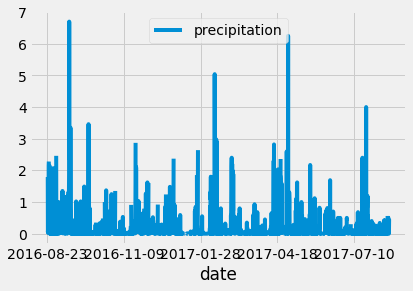

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results = []

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['date','precipitation'])

df.set_index(df['date'], inplace=True)

# print(df)

print(df.to_string(index=False))

# Sort the dataframe by date

df = df.sort_index()

print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data

df.plot()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [15]:
# What are the most active stations?

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

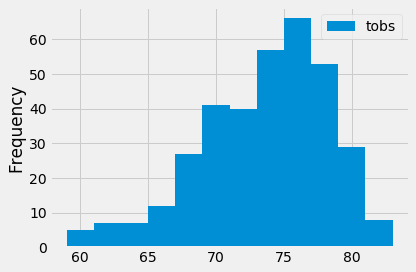

In [17]:
# Choose the station with the highest number of temperature observations.

session.query(Measurement.tobs)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

df = pd.DataFrame(results, columns=['tobs'])
print(df)

df.plot.hist(bins=12)
plt.tight_layout()

# Challenge

In [81]:
# range = pd.date_range('2010-06-01', periods=365*7, freq='M')

# results = session.query(Measurement.date, Measurement.prcp).all()

# df = pd.DataFrame(results, columns=['date','precipitation'])

# june_df = df['precipitation'].filter(lambda x: re.match('\d{4}-\d[6]-\d{2}')
                                     
# df
                                                                   

SyntaxError: invalid syntax (<ipython-input-81-c3dafb5339bb>, line 9)

In [35]:
# june_form = r'\d{4}-\d[6]-\d{2}'
# dec_form = r'\d{4}-\d[12]-\d{2}'             

# june_df = df['precipitation'].filter(lambda x: re.match('\d{4}-\d[6]-\d{2}',df)

# june_df = pd.date_range('2010-06-01',periods = 7, freq ='Y')

# june = df[(df['date'] > '2010-06-01'& (df['date'] < '2010-06-30')]

# print(june)

# # print(june.strftime("%B"))

# print(df.loc['2010-06','2011-06','2012-06','2013-06'])
           
# june_start = dt.date(2010, 6, 1)

# # Calculate the date one year from the last date in data set.

# june_start = dt.date(june_start) + dt.timedelta(days=30)

# print(df.june_start)

Empty DataFrame
Columns: [date, precipitation]
Index: []


In [208]:
df = pd.DataFrame(results, columns=['date','precipitation'])

# df.set_index('date', inplace=True)

# june = df['date'].between('2010-06-01','2010-06-30',inclusive = True)

# df[june]

# frames = [june_1, june_2, june_3, june_4, june_5, june_6, june_7]

# june_df = pd.concat(frames)

# june_1

june_1 = df['date'].between('2010-06-01','2010-06-30',inclusive = True)
june_2 = df['date'].between('2011-06-01','2011-06-30',inclusive = True)
june_3 = df['date'].between('2012-06-01','2012-06-30',inclusive = True)
june_4 = df['date'].between('2013-06-01','2013-06-30',inclusive = True)
june_5 = df['date'].between('2014-06-01','2014-06-30',inclusive = True)
june_6 = df['date'].between('2015-06-01','2015-06-30',inclusive = True)
june_7 = df['date'].between('2016-06-01','2016-06-30',inclusive = True)
june_8 = df['date'].between('2017-06-01','2017-06-30',inclusive = True)

june_1_df = df[june_1]
june_2_df = df[june_2]
june_3_df = df[june_3]
june_4_df = df[june_4]
june_5_df = df[june_5]
june_6_df = df[june_6]
june_7_df = df[june_7]
june_8_df = df[june_8]

june_df = pd.concat([june_1_df,june_2_df,june_3_df,june_4_df,june_5_df,june_6_df,june_7_df,june_8_df], axis = 0)

june_df.describe()



,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [209]:
dec_1 = df['date'].between('2010-12-01','2010-12-30',inclusive = True)
dec_2 = df['date'].between('2011-12-01','2011-12-30',inclusive = True)
dec_3 = df['date'].between('2012-12-01','2012-12-30',inclusive = True)
dec_4 = df['date'].between('2013-12-01','2013-12-30',inclusive = True)
dec_5 = df['date'].between('2014-12-01','2014-12-30',inclusive = True)
dec_6 = df['date'].between('2015-12-01','2015-12-30',inclusive = True)
dec_7 = df['date'].between('2016-12-01','2016-12-30',inclusive = True)
dec_8 = df['date'].between('2017-12-01','2017-12-30',inclusive = True)

dec_1_df = df[dec_1]
dec_2_df = df[dec_2]
dec_3_df = df[dec_3]
dec_4_df = df[dec_4]
dec_5_df = df[dec_5]
dec_6_df = df[dec_6]
dec_7_df = df[dec_7]
dec_8_df = df[dec_8]

dec_df = pd.concat([dec_1_df,dec_2_df,dec_3_df,dec_4_df,dec_5_df,dec_6_df,dec_7_df,dec_8_df], axis = 0)

dec_df.describe()



,precipitation
count,1365.000000
mean,0.218007
std,0.547626
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 <a list of 10 Text xticklabel objects>)

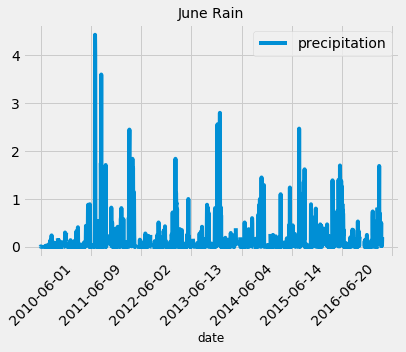

In [252]:
june_df.plot('date','precipitation')
plt.title('June Rain', fontsize = 14)
plt.xlabel('date', fontsize = 12)
plt.xticks(rotation =45)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.]),
 <a list of 9 Text xticklabel objects>)

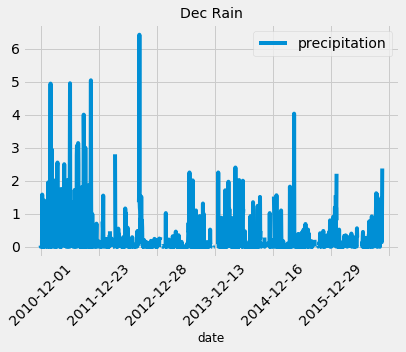

In [253]:
dec_df.plot('date','precipitation')
plt.title('Dec Rain', fontsize = 14)
plt.xlabel('date', fontsize = 12)
plt.xticks(rotation =45)